# Dog Breeds - Data Science project

# Step 4 : Clustering and Modeling Data

In this step, we will Clustering the data into groups, modeling and compare the algorithms results

In [135]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import os
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
import scipy.cluster.hierarchy as shc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# To make this notebook's output stable across runs
np.random.seed(42)

In [136]:
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [137]:
#set style of plots
sns.set_style('white')

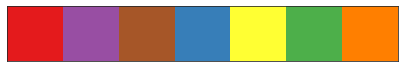

In [138]:
#define a custom palette
customPalette = ["#e41a1c","#984ea3","#a65628","#377eb8","#ffff33","#4daf4a","#ff7f00"]
sns.set_palette(customPalette)
sns.palplot(customPalette)

In [139]:
# Ignore useless warnings (see SciPy issue #5998)
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [140]:
# Load the dataset
df = pd.read_csv("dog_breed_data_handling_missing_values.csv",index_col = 0)
# Print the first 5 rows of the dataframe.
df.head()

,breed name,Dog Breed Group,Height,Height Avg.,Weight,Weight Avg.,Life Span,Life Span Avg.,Adaptability,Adapts Well To Apartment Living,...,Intelligence,Potential For Mouthiness,Prey Drive,Tendency To Bark Or Howl,Wanderlust Potential,Physical Needs,Energy Level,Intensity,Exercise Needs,Potential For Playfulness
0,Afador,Mixed Breed Dogs,20 to 29 inches,24.5,50 to 75 pounds,62.5,10 to 12 years,11.0,2,1,...,5,4,4.0,4.0,4,4,4,4,4,3
1,Affenhuahua,Mixed Breed Dogs,6 to 12 inches,9.0,4 to 12 pounds,8.0,13 to 18 years,15.5,3,4,...,3,4,2.0,4.0,2,3,4,3,3,3
2,Affenpinscher,Companion Dogs,9 to 11 inches tall at the shoulder,10.0,7 to 9 pounds,8.0,12 to 14 years,13.0,3,5,...,4,4,3.0,2.0,2,4,4,3,3,4
3,Afghan Hound,Hound Dogs,24 to 26 inches tall at the shoulder,25.0,50 to 60 pounds,55.0,10 to 12 years,11.0,4,5,...,4,3,5.0,2.0,5,4,5,2,4,4
4,Airedale Terrier,Terrier Dogs,21 to 23 inches tall at the shoulder,22.0,40 to 65 pounds,52.5,10 to 13 years,11.5,2,1,...,5,5,5.0,4.0,4,5,5,3,5,5


In [141]:
df_features = df.copy(deep='true')

# drop the columns with string values
df_features = df_features.drop(['breed name','Dog Breed Group','Height','Weight','Life Span'],axis=1)
df_features.head()

,Height Avg.,Weight Avg.,Life Span Avg.,Adaptability,Adapts Well To Apartment Living,Good For Novice Owners,Sensitivity Level,Tolerates Being Alone,Tolerates Cold Weather,Tolerates Hot Weather,...,Intelligence,Potential For Mouthiness,Prey Drive,Tendency To Bark Or Howl,Wanderlust Potential,Physical Needs,Energy Level,Intensity,Exercise Needs,Potential For Playfulness
0,24.5,62.5,11.0,2,1,1,3,3,4,2,...,5,4,4.0,4.0,4,4,4,4,4,3
1,9.0,8.0,15.5,3,4,4,4,1,2,3,...,3,4,2.0,4.0,2,3,4,3,3,3
2,10.0,8.0,13.0,3,5,4,3,1,3,3,...,4,4,3.0,2.0,2,4,4,3,3,4
3,25.0,55.0,11.0,4,5,3,5,2,5,5,...,4,3,5.0,2.0,5,4,5,2,4,4
4,22.0,52.5,11.5,2,1,2,3,2,3,3,...,5,5,5.0,4.0,4,5,5,3,5,5


In [142]:
df.head()

,breed name,Dog Breed Group,Height,Height Avg.,Weight,Weight Avg.,Life Span,Life Span Avg.,Adaptability,Adapts Well To Apartment Living,...,Intelligence,Potential For Mouthiness,Prey Drive,Tendency To Bark Or Howl,Wanderlust Potential,Physical Needs,Energy Level,Intensity,Exercise Needs,Potential For Playfulness
0,Afador,Mixed Breed Dogs,20 to 29 inches,24.5,50 to 75 pounds,62.5,10 to 12 years,11.0,2,1,...,5,4,4.0,4.0,4,4,4,4,4,3
1,Affenhuahua,Mixed Breed Dogs,6 to 12 inches,9.0,4 to 12 pounds,8.0,13 to 18 years,15.5,3,4,...,3,4,2.0,4.0,2,3,4,3,3,3
2,Affenpinscher,Companion Dogs,9 to 11 inches tall at the shoulder,10.0,7 to 9 pounds,8.0,12 to 14 years,13.0,3,5,...,4,4,3.0,2.0,2,4,4,3,3,4
3,Afghan Hound,Hound Dogs,24 to 26 inches tall at the shoulder,25.0,50 to 60 pounds,55.0,10 to 12 years,11.0,4,5,...,4,3,5.0,2.0,5,4,5,2,4,4
4,Airedale Terrier,Terrier Dogs,21 to 23 inches tall at the shoulder,22.0,40 to 65 pounds,52.5,10 to 13 years,11.5,2,1,...,5,5,5.0,4.0,4,5,5,3,5,5


In [143]:
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_features)
    Sum_of_squared_distances.append(km.inertia_)

In [144]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(df_features)

KMeans()

In [145]:
# PCA to reduce our data to 2 dimensions for visualisation
y_kmeans = kmeans.predict(df_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_features)

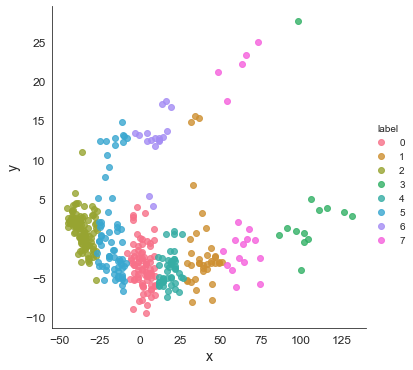

In [146]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [147]:
# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_features)

# Normalizing the data so that the data approximately
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)


In [148]:

pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

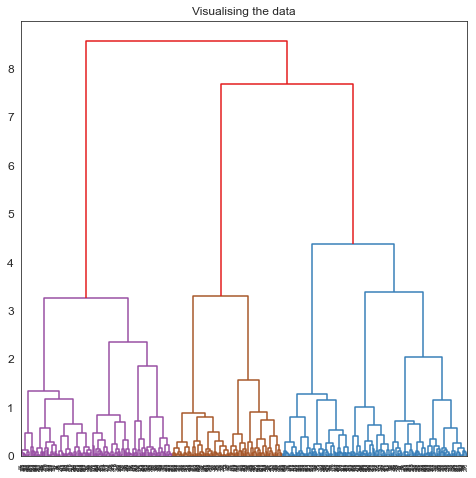

In [149]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))


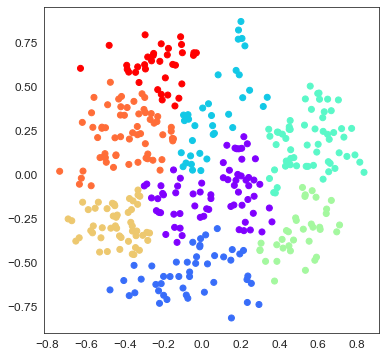

In [160]:
# applied agglomerative clustering with value of k=8 (Hierarchical clustering)
ac6 = AgglomerativeClustering(n_clusters = 8)
  
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = ac6.fit_predict(X_principal), cmap ='rainbow')
plt.show()

In [161]:
df['breed group after clustering'] = y_kmeans

In [162]:
df = df.sample(frac=1)
df['breed group after clustering'].value_counts()

2    110
0     83
5     66
4     44
1     37
7     19
6     17
3     13
Name: breed group after clustering, dtype: int64

In [163]:
df.sort_index(inplace=True)
df.head()

,breed name,Dog Breed Group,Height,Height Avg.,Weight,Weight Avg.,Life Span,Life Span Avg.,Adaptability,Adapts Well To Apartment Living,...,Potential For Mouthiness,Prey Drive,Tendency To Bark Or Howl,Wanderlust Potential,Physical Needs,Energy Level,Intensity,Exercise Needs,Potential For Playfulness,breed group after clustering
0,Afador,Mixed Breed Dogs,20 to 29 inches,24.5,50 to 75 pounds,62.5,10 to 12 years,11.0,2,1,...,4,4.0,4.0,4,4,4,4,4,3,4
1,Affenhuahua,Mixed Breed Dogs,6 to 12 inches,9.0,4 to 12 pounds,8.0,13 to 18 years,15.5,3,4,...,4,2.0,4.0,2,3,4,3,3,3,2
2,Affenpinscher,Companion Dogs,9 to 11 inches tall at the shoulder,10.0,7 to 9 pounds,8.0,12 to 14 years,13.0,3,5,...,4,3.0,2.0,2,4,4,3,3,4,2
3,Afghan Hound,Hound Dogs,24 to 26 inches tall at the shoulder,25.0,50 to 60 pounds,55.0,10 to 12 years,11.0,4,5,...,3,5.0,2.0,5,4,5,2,4,4,0
4,Airedale Terrier,Terrier Dogs,21 to 23 inches tall at the shoulder,22.0,40 to 65 pounds,52.5,10 to 13 years,11.5,2,1,...,5,5.0,4.0,4,5,5,3,5,5,0


In [164]:
X =df_features
y = y_kmeans

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

rfc = RandomForestClassifier(n_estimators=100,criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [165]:
y_pred = rfc.predict(X_test)

In [166]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[28  0  0  0  0  1  0  0]
 [ 0  6  0  0  0  0  0  0]
 [ 0  0 39  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  3]
 [ 1  1  0  0 10  0  0  0]
 [ 1  0  0  0  0 23  1  0]
 [ 2  0  0  0  0  0  5  0]
 [ 0  3  0  0  0  0  0  2]]


<AxesSubplot:title={'center':'Confusion matrix for Random Forest'}, xlabel='Predicted label', ylabel='True label'>

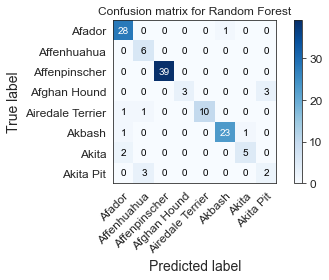

In [167]:

# Confusion matrix
definitions = ['Afador', 'Affenhuahua','Affenpinscher','Afghan Hound','Airedale Terrier','Akbash','Akita','Akita Pit']
# reversefactor = dict(zip(range(4),definitions))
# actual = np.vectorize(reversefactor.get)(y_test)
# pred = np.vectorize(reversefactor.get)(y_pred)
# print(pd.crosstab(actual, pred, rownames=['Actual Mood'], colnames=['Predicted Mood']))

plot_confusion_matrix(y_test, y_pred, classes=definitions,
                      title='Confusion matrix for Random Forest')

In [168]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8992248062015504


In [169]:
df.to_csv('data-after-clustering.csv')